######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35b2c3">Bagging and Random Forest
<font color=darkblue>

######  <span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#35b2c3">Bagging
    

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#4dc335">Import Libraries
<font color=darkblue>
*Bootstrap Aggregation (Bagging)
 
*An ensemble method is a technique that combines the predictions from multiple machine learning algorithms together to make more accurate predictions than any individual model.
   
*Bagging constructs n classification trees using bootstrap sampling of the training data and then combines their predictions to produce a final meta-prediction.

*Reduces variance of individual model in the ensemble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0e36ea">Import dataset
<font color=darkblue>

In [2]:
# data = pd.read_csv('/home/jayanthikishore/Downloads/ML_classwork/DT_RF_Ensemble/indian_liver_patient.csv')
data = pd.read_csv('/Users/preethamvignesh/Downloads/ML_classwork/DT_RF_Ensemble/indian_liver_patient.csv')

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#0eea8e">Features in dataset

In [3]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eacd0e">Data type

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#eaaf0e">Checking the NaN values

In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea990e">Exploratory data Analysis (EDA)

<AxesSubplot:xlabel='Dataset', ylabel='count'>

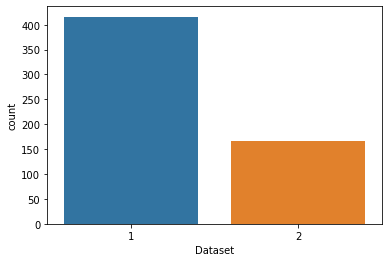

In [6]:
sns.countplot(data = data, x = "Dataset", label = "Count")

<AxesSubplot:xlabel='Gender', ylabel='count'>

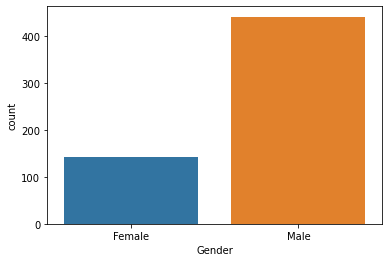

In [7]:
sns.countplot(data = data, x = "Gender", label = "Count")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea990e">Correlation Analysis

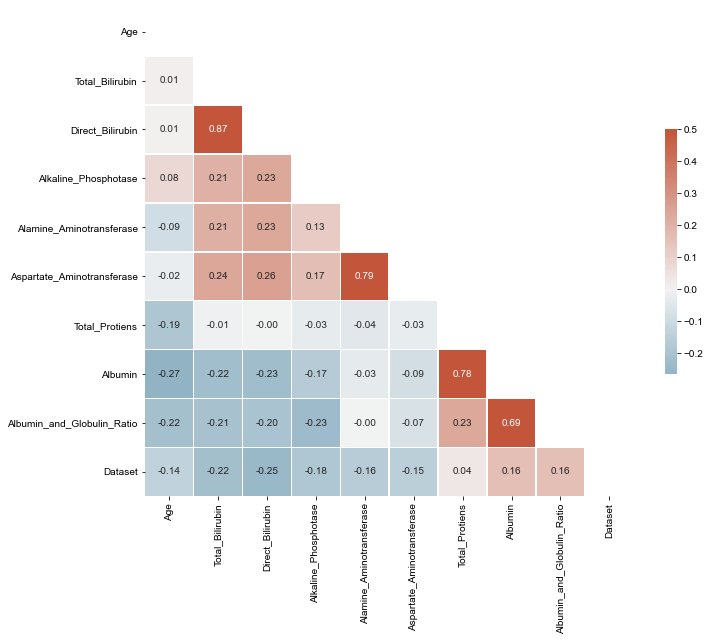

In [8]:
from string import ascii_letters
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,fmt='.2f')
sns.set(font_scale=1.1)

*Two category columns: Age and Dataset(y value). In the Dataset 1 mean ill and 2 means healty. Albumin_and_Globulin_Ratio has missing values.

In [9]:
#Convert the Dataset columns into strings.
data['Dataset'].replace({1:'ill',2:'healthy'}, inplace=True)
# converts all string columns into catergory
data["Dataset"] = data["Dataset"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         583 non-null    int64   
 1   Gender                      583 non-null    category
 2   Total_Bilirubin             583 non-null    float64 
 3   Direct_Bilirubin            583 non-null    float64 
 4   Alkaline_Phosphotase        583 non-null    int64   
 5   Alamine_Aminotransferase    583 non-null    int64   
 6   Aspartate_Aminotransferase  583 non-null    int64   
 7   Total_Protiens              583 non-null    float64 
 8   Albumin                     583 non-null    float64 
 9   Albumin_and_Globulin_Ratio  579 non-null    float64 
 10  Dataset                     583 non-null    category
dtypes: category(2), float64(5), int64(4)
memory usage: 42.4 KB


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Label encoder

In [10]:
#label encoder
le = preprocessing.LabelEncoder()
le.fit(data['Gender'])
data['Gender_Encoded'] = le.transform(data['Gender'])

In [11]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Encoded
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,healthy,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,ill,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,ill,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,ill,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,healthy,1


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Liver disease patients information

In [12]:
# Counting the number of patients
LD, NLD = data['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)
print(f'Ill patients in the dataset are {LD/(NLD+LD)*100} percent of the total')

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167
Ill patients in the dataset are 71.35506003430532 percent of the total


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Dendogram diagram

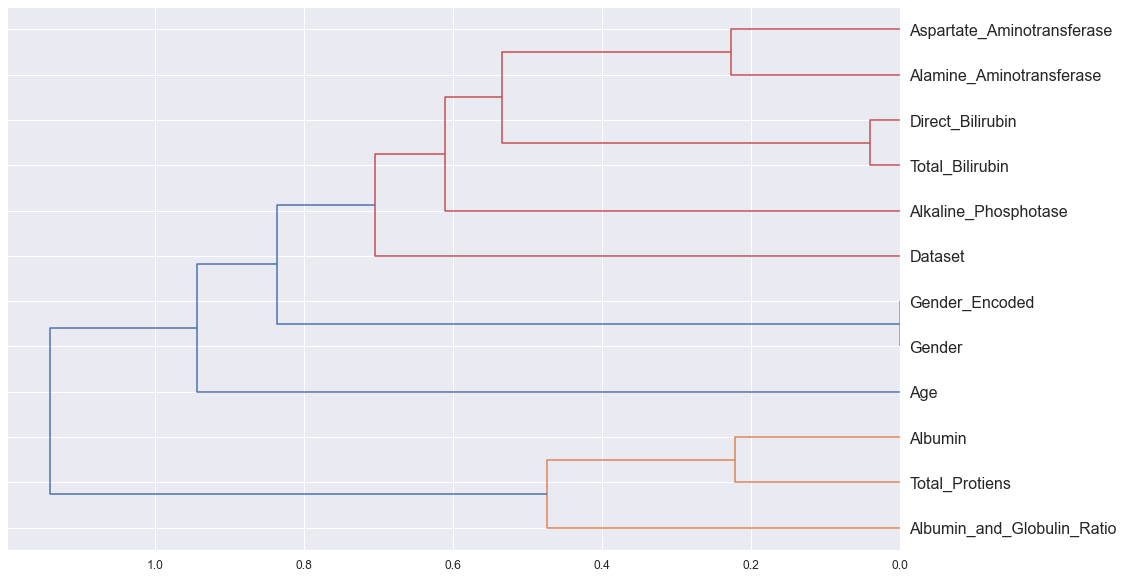

In [13]:
import scipy
from scipy.cluster import hierarchy as hc
# Redundant Features
corr = np.round(scipy.stats.spearmanr(data).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=data.columns, orientation='left', leaf_font_size=16)
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Filling missing values

In [14]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [15]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Encoded
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,ill,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,ill,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,ill,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,ill,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,ill,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,healthy,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,ill,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,ill,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,ill,1


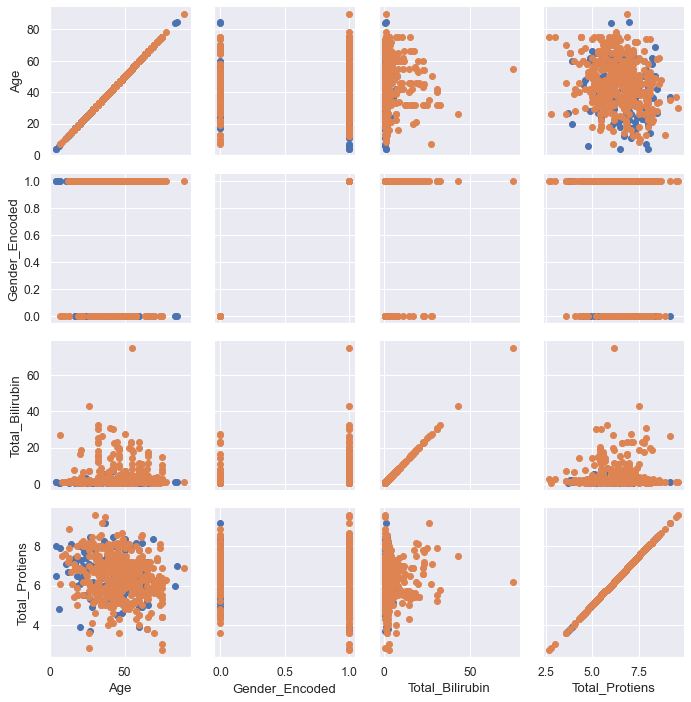

In [16]:
g = sns.PairGrid(data, hue = "Dataset", vars=['Age','Gender_Encoded','Total_Bilirubin','Total_Protiens'])
g.map(plt.scatter)
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Split trian and test datasets

In [17]:
# machine learning  - supervised
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score


In [18]:
X = data[['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
        'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 
        'Albumin', 'Albumin_and_Globulin_Ratio','Gender_Encoded']]
y = data[['Dataset']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
print(X_train.shape,X_test.shape)



(408, 10) (175, 10)


######  <span style="font-family: Arial; font-weight:bold;font-size:1.em;color:#ea660e">Random Forest Classifier

In [19]:
#Random Forest
rf = RandomForestClassifier(n_estimators=25, random_state=0)
rf.fit(X_train, y_train)
rf_predicted = rf.predict(X_test)

random_forest_score      = round(rf.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(rf.score(X_test, y_test) * 100, 2)

print('Random Forest Score: ', random_forest_score)
print('Random Forest Test Score: ', random_forest_score_test)
print('Accuracy: ', (accuracy_score(y_test,rf_predicted)) *100,4)


# g = sns.heatmap(confusion_matrix(y_test,rf_predicted), annot=True, fmt="d")

Random Forest Score:  99.75
Random Forest Test Score:  72.0
Accuracy:  72.0 4


In [20]:
print('\nClassification report: \n', classification_report(y_test,rf_predicted))


Classification report: 
               precision    recall  f1-score   support

     healthy       0.52      0.34      0.41        50
         ill       0.77      0.87      0.82       125

    accuracy                           0.72       175
   macro avg       0.64      0.61      0.61       175
weighted avg       0.70      0.72      0.70       175



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)
con_res = confusion_matrix(y_test,rf_predicted)
# con_res = metrics.confusion_matrix(y_test,y_pred, labels=[0, 1])

print("Confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[ 17  33]
 [ 16 109]]
Accuracy: 72.00%


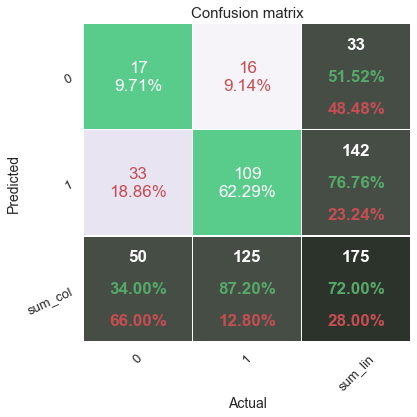

In [22]:
# %run -i '/home/jayanthikishore/Desktop/Analysis/Work/ML_EIT/confusion_matrix_different_ways1.py'
%run -i '/Users/preethamvignesh/Desktop/Work/ML_EIT/confusion_matrix_different_ways1.py'

df_confmatrx = pd.DataFrame(con_res, range(2),range(2))
df_confmatrx
cmap = 'PuRd'
confusion_matrix_dfrntway(df_confmatrx, cmap=cmap,fz=17)